# Business Understanding

This is a Sales predictive project which was one of my data analytics coursework projects I completed during my MSc Business Aanalytics at Alliance Manchester Business School. The purpose of this project is to predict the sales for different stores in the retail sector. The project involved the analysis of store-related factors and historical sales data which was collected form a range of large drug stores across Europe. 

As sales can be affected by many factors such as promotions, competion, holidays, seasonility and locality as a result they are difficult to accurately predict. In this project I will be predicting 6 weeks of daily sales for 1,115 drug stores. Hopefully, a reliable sales forecasts will enable the store managers to increase their overall productivity and profitibility of the retail business, improve their customer satisfaction and lower churn rate. 

One of the biggest challenges of this project was to effectively pre-process the training dataset, as there are a large number of missing values. Additionally, the dataset dimension is also required to be reduced through appropriate means. Additionally, range of predictive modelling techniques were also explored.  

## Store Dataset columns breakdown

1) Store -->	the anonymised store number.

2) StoreType -->	4 different store models: a, b, c, d.

3) Assortment -->	an assortment level: a = basic, b = extra, c = extended.

4) CompetitionDistance -->	distance in meters to the nearest competitor store.

5) CompetitionOpenSinceMonth -->	the approximate month of the time when the nearest competitor was opened.

6) CompetitionOpenSinceYear --> the approximate year of the time when the nearest competitor was opened.

7) Promo2 -->	a continuing and consecutive promotion, e.g., a coupon based mailing campaign, for some stores: 0 = store is not participating, 1 = store is participating.

8) Promo2SinceWeek -->	the calendar week when the store started participating in Promo2.

9) Promo2SinceYear -->	the year when the store started participating in Promo2.

10) PromoInterval -->	the consecutive intervals in which Promo2 is re-started, naming the months the promotion is started anew. e.g., "Feb,May,Aug,Nov" means each round of the coupon based mailing campaign starts in February, May, August, November of any given year for that store, as the coupons, mostly for a discount on certain products are usually valid for three months, and a new round of mail needs to be sent to customers just before those coupons have expired.


## Train Dataset Breakdown

1) Store --->	the anonymised store number.

2) DayOfWeek -->	the day of the week: 1 = Monday, 2 = Tuesday, ….

3) Date -->	the given date.

4) Sales --> the turnover on a given day.

5) Customers -->	the number of customers on a given day.

6) Open --> 	an indicator for whether the store was open on that day: 0 = closed, 1 = open.

7) Promo -->	indicates whether a store is running a store-specific promo on that day.

8) StateHoliday -->	indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = none.

9) SchoolHoliday -->	indicates if the (Store, Date) was affected by the closure of public schools


## Test Dataset Breakdown

This file is identical to train.csv, except that Sales and Customers are unknown for the period of 01/08/2015 to 17/09/2015.

## Evaluation of Forecasting accuracy

For this project I have selected the Root Mean Suared Error(RMSE) as the metric to evaluate the performacne of the different modeling methods. 

# Data Cleaning

In [521]:
#installing depndencies 
import pandas as pd 
import seaborn as sns 
import numpy as np 
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA

In [522]:
#Importing the two datasets separately
train = pd.read_csv("DA2021_train.csv")
store = pd.read_csv("DA2021_store.csv")

C:\Users\ispan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [523]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [524]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                1 non-null      object 
dtypes: float64(6), int64(2), object(4)
memory usage: 104.7+ KB


In [525]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [526]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN


In [527]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [528]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Unnamed: 10
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,0.0
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,NaN


In [529]:
#look at numeric and categorical values separately
store_num = store[["CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear", "Promo2SinceWeek","Promo2SinceYear"]]
store_cat = store[["Store", "StoreType", "Assortment", "Promo2", "PromoInterval"]]

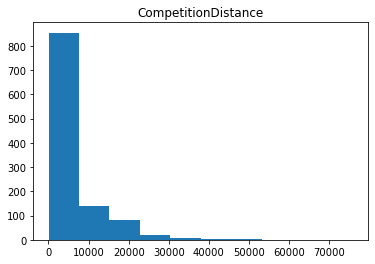

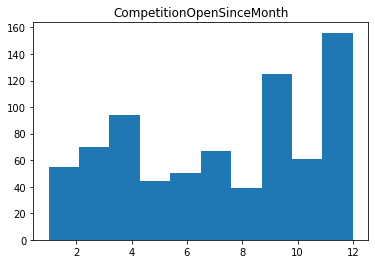

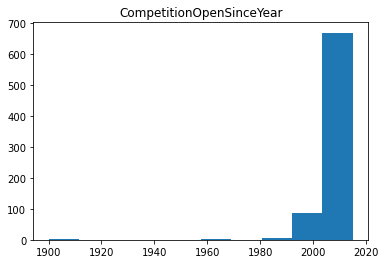

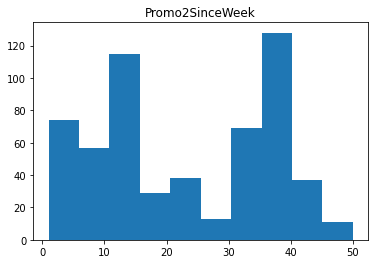

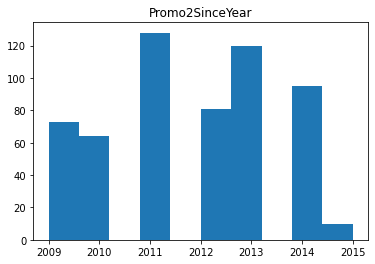

In [530]:
for i in store_num.columns:
    plt.hist(store_num[i])
    plt.title(i)
    plt.show()

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CompetitionDistance')

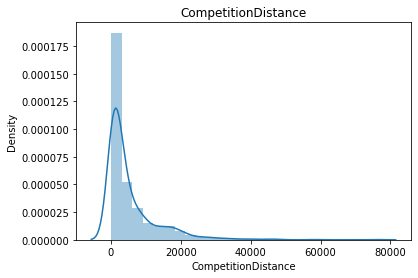

In [531]:
sns.distplot(store_num['CompetitionDistance'], bins = 25).set_title("CompetitionDistance")


C:\Users\ispan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CompetitionOpenSinceYear')

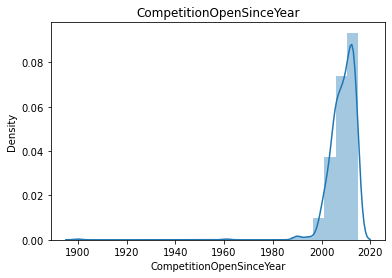

In [532]:
sns.distplot(store_num['CompetitionOpenSinceYear'], bins = 25).set_title("CompetitionOpenSinceYear")


                           CompetitionDistance  CompetitionOpenSinceMonth  \
CompetitionDistance                   1.000000                  -0.059126   
CompetitionOpenSinceMonth            -0.059126                   1.000000   
CompetitionOpenSinceYear              0.025124                  -0.052250   
Promo2SinceWeek                      -0.060552                  -0.035504   
Promo2SinceYear                      -0.109504                   0.047815   

                           CompetitionOpenSinceYear  Promo2SinceWeek  \
CompetitionDistance                        0.025124        -0.060552   
CompetitionOpenSinceMonth                 -0.052250        -0.035504   
CompetitionOpenSinceYear                   1.000000        -0.079984   
Promo2SinceWeek                           -0.079984         1.000000   
Promo2SinceYear                            0.006354        -0.217650   

                           Promo2SinceYear  
CompetitionDistance              -0.109504  
CompetitionOpe

<AxesSubplot:>

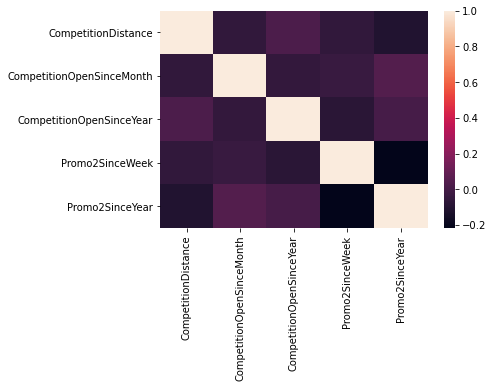

In [533]:
# Now looking at the correlation among the numerical values
print(store_num.corr())
sns.heatmap(store_num.corr())

### From heatmap we can outline that there are no siginificant correlation between the variables

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


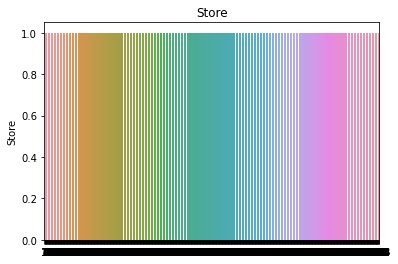

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


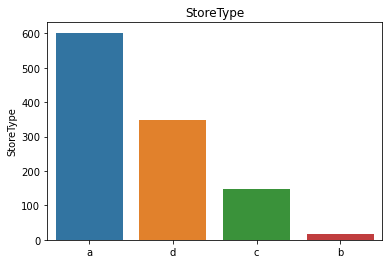

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


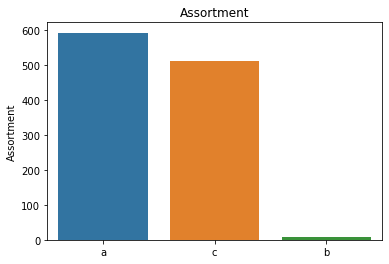

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


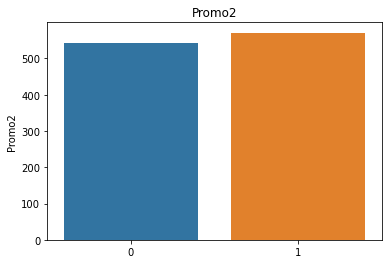

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


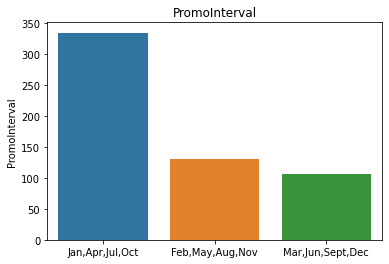

In [534]:
#Now for the categoricla variables 
for i in store_cat.columns:
    sns.barplot(store_cat[i].value_counts().index, store_cat[i].value_counts()).set_title(i)
    plt.show()

In [535]:
#look at numeric and categorical values separately
train_num = train[["Sales","Customers"]]
train_cat = train[["Store","DayOfWeek", "Date", "Open","Promo", "StateHoliday", "SchoolHoliday"]]

In [536]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


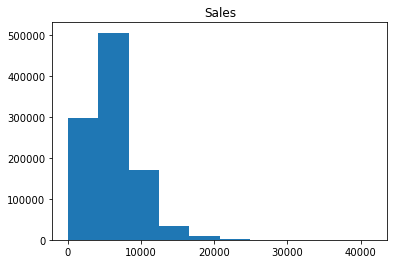

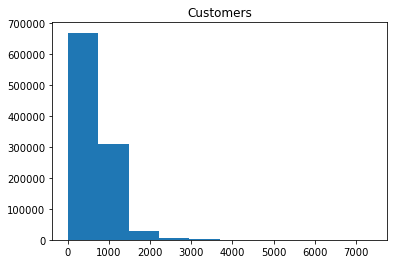

In [537]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales')

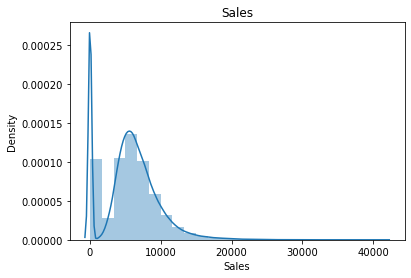

In [538]:
#Creating a distibution chart
sns.distplot(train_num['Sales'], bins = 25).set_title("Sales")

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers')

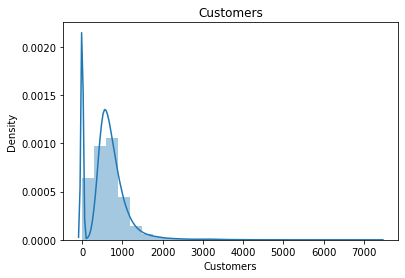

In [539]:
sns.distplot(train_num['Customers'], bins = 25).set_title("Customers")

              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


<AxesSubplot:>

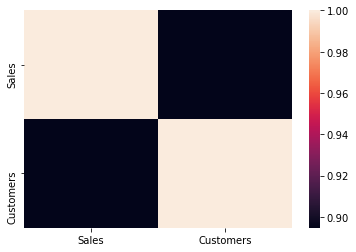

In [540]:
# Now looking at the correlation among the numerical values
print(train_num.corr())
sns.heatmap(train_num.corr())

##### From this we can tell that there is a positive correlation between customers and sales

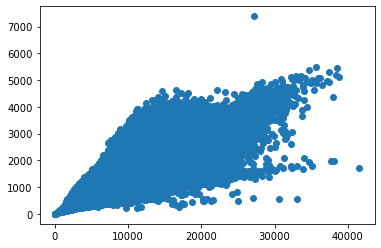

In [541]:
plt.scatter(train_num["Sales"],train_num["Customers"])

In [542]:
#calcualting the covariance between Sales and customers
covariance = np.cov(train_num["Sales"],train_num["Customers"])
print(covariance)

[[14821931.55475776  1599698.92375404]
 [ 1599698.92375404   215678.25857159]]


###### The covariance between the two variable is verry strong at 1599698.92375404, as this is a verry high number we will use Spearman's RankCorrelation to confirm this relationship

In [543]:
#Calculating the Spearman's Rank correlation as the variable are not normally distibuted
from scipy.stats import spearmanr

corr = spearmanr(train_num["Sales"],train_num["Customers"])
print("Spearmans correlation:",corr[0].round(4))

Spearmans correlation: 0.9034


##### Spearmans Rank Correlation score of 0.9034 indicates a strong monotonic relationship between the two variables, therefore it would be sufficient to drop one of the variables.  We will carry on with the sales variable and drop customers. 

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


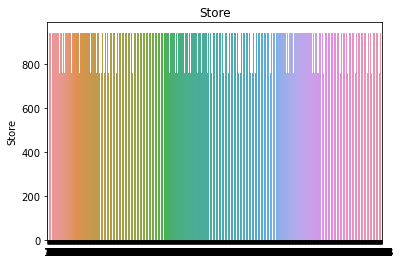

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


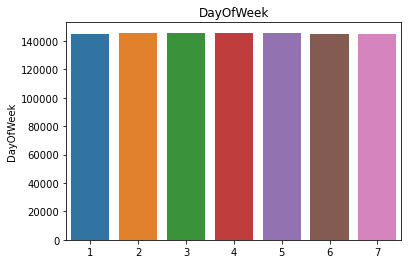

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


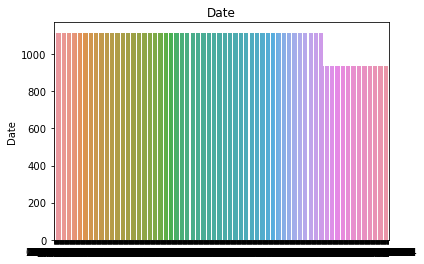

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


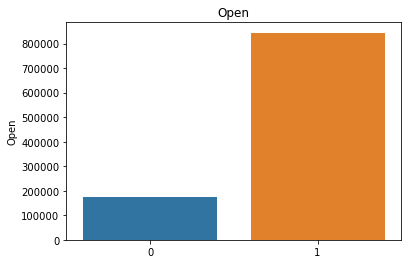

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


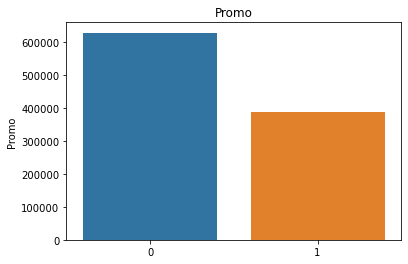

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


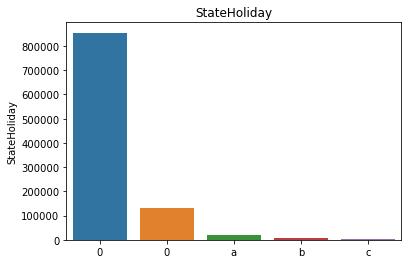

C:\Users\ispan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


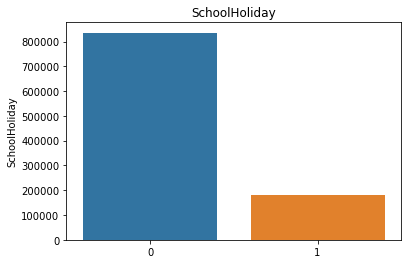

In [544]:
#Now for the categoricla variables 
for i in train_cat.columns:
    sns.barplot(train_cat[i].value_counts().index, train_cat[i].value_counts()).set_title(i)
    plt.show()

## Data Cleaning

In [545]:
#Finding the % of missing values
train.isnull().mean()

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [546]:
#Finding the % of missing values in the store data set
store.isnull().mean()*100

Store                          0.000000
StoreType                      0.000000
Assortment                     0.000000
CompetitionDistance            0.269058
CompetitionOpenSinceMonth     31.748879
CompetitionOpenSinceYear      31.748879
Promo2                         0.000000
Promo2SinceWeek               48.789238
Promo2SinceYear               48.789238
PromoInterval                 48.789238
Unnamed: 10                  100.000000
Unnamed: 11                   99.910314
dtype: float64

In [547]:
#filling Competition Distance with mean values as the % of missing values is less than 1%
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

In [548]:
#Finding the % of missing values in the store data set
store.isnull().mean()*100

Store                          0.000000
StoreType                      0.000000
Assortment                     0.000000
CompetitionDistance            0.000000
CompetitionOpenSinceMonth     31.748879
CompetitionOpenSinceYear      31.748879
Promo2                         0.000000
Promo2SinceWeek               48.789238
Promo2SinceYear               48.789238
PromoInterval                 48.789238
Unnamed: 10                  100.000000
Unnamed: 11                   99.910314
dtype: float64

In [549]:
# Dropping unwanted variables
store = store.drop(['Unnamed: 10','Unnamed: 11'], axis = 1)

In [550]:
store.isnull().mean()

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.000000
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [551]:
#Finding the dimensions of the store dataset
store.shape

(1115, 10)

In [552]:
#List of columns in the store dataset
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Using the KNN method to impute the missing values
I have used this method as this method will impute the most realistic missing value replacement

In [553]:
# creating a copy as a backup
store_knn = store.copy()

In [554]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [555]:
store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [556]:
store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [557]:
store["PromoInterval"] = store["PromoInterval"].fillna('0')

In [558]:
store["PromoInterval"].unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [559]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
store['PromoInterval']= label_encoder.fit_transform(store['PromoInterval'])

In [560]:
store['StoreType']= label_encoder.fit_transform(store['StoreType'])
store['Assortment']= label_encoder.fit_transform(store['Assortment'])

In [561]:
store['PromoInterval'].unique()

array([0, 2, 1, 3])

In [562]:
store['StoreType'].unique()

array([2, 0, 3, 1])

In [563]:
store['Assortment'].unique()

array([0, 2, 1])

In [564]:
store["PromoInterval"] = store['PromoInterval'].replace(0, np.nan)

In [565]:
store['PromoInterval'].unique()

array([nan,  2.,  1.,  3.])

In [566]:
store.isnull().mean()

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.000000
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [567]:
store.shape[0]

1115

In [568]:
store.isnull().mean()

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.000000
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [569]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,2.0
1111,1112,2,2,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,0,2,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,0,2,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,3,2,5350.0,NaN,NaN,1,22.0,2012.0,3.0


In [570]:
store_scale = store.copy()

In [571]:
store_scale.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [572]:
#Using the min-max method to ensure that the accuracy of imputation increases
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
store_scale = pd.DataFrame(scaler.fit_transform(store_scale), columns = store_scale.columns)
store_scale.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0.000000,0.666667,0.0,0.016482,0.727273,0.939130,0.0,NaN,NaN,NaN
1,0.000898,0.000000,0.0,0.007252,0.909091,0.930435,1.0,0.244898,0.166667,0.5
2,0.001795,0.000000,0.0,0.186050,1.000000,0.921739,1.0,0.265306,0.333333,0.5
3,0.002693,0.666667,1.0,0.007911,0.727273,0.947826,0.0,NaN,NaN,NaN
4,0.003591,0.000000,0.0,0.394119,0.272727,1.000000,0.0,NaN,NaN,NaN


In [573]:
# Outlining the first 5 store details
store_scale.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0.000000,0.666667,0.0,0.016482,0.727273,0.939130,0.0,NaN,NaN,NaN
1,0.000898,0.000000,0.0,0.007252,0.909091,0.930435,1.0,0.244898,0.166667,0.5
2,0.001795,0.000000,0.0,0.186050,1.000000,0.921739,1.0,0.265306,0.333333,0.5
3,0.002693,0.666667,1.0,0.007911,0.727273,0.947826,0.0,NaN,NaN,NaN
4,0.003591,0.000000,0.0,0.394119,0.272727,1.000000,0.0,NaN,NaN,NaN


In [574]:
#KNN method used to impute the missing value 
from sklearn.impute import KNNImputer
impute_knn = KNNImputer()
store_imputed = pd.DataFrame(impute_knn.fit_transform(store_scale))

In [575]:
store_imputed.tail()

,0,1,2,3,4,5,6,7,8,9
1110,0.996409,0.000000,0.0,0.024789,0.454545,0.991304,1.0,0.612245,0.666667,0.5
1111,0.997307,0.666667,1.0,0.024525,0.272727,0.921739,0.0,0.236735,0.466667,0.6
1112,0.998205,0.000000,1.0,0.121835,0.509091,0.960000,0.0,0.563265,0.566667,0.1
1113,0.999102,0.000000,1.0,0.011208,0.672727,0.949565,0.0,0.404082,0.566667,0.7
1114,1.000000,1.000000,1.0,0.070280,0.654545,0.953043,1.0,0.428571,0.500000,1.0


In [576]:
# Transforming the imputed values back into original data format
store_imputed = pd.DataFrame(scaler.inverse_transform(store_imputed))

In [577]:
store_imputed.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,2.0,0.0,1270.0,9.0,2008.0,0.0,14.8,2011.0,1.8
1,2.0,0.0,0.0,570.0,11.0,2007.0,1.0,13.0,2010.0,2.0
2,3.0,0.0,0.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,2.0
3,4.0,2.0,2.0,620.0,9.0,2009.0,0.0,21.0,2011.8,2.2
4,5.0,0.0,0.0,29910.0,4.0,2015.0,0.0,32.4,2009.4,2.0


In [578]:
#Ensuring that all the values have been fully imputed
store_imputed.isnull().mean()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

In [579]:
store_imputed.tail()

,0,1,2,3,4,5,6,7,8,9
1110,1111.0,0.0,0.0,1900.0,6.0,2014.0,1.0,31.0,2013.0,2.0
1111,1112.0,2.0,2.0,1880.0,4.0,2006.0,0.0,12.6,2011.8,2.2
1112,1113.0,0.0,2.0,9260.0,6.6,2010.4,0.0,28.6,2012.4,1.2
1113,1114.0,0.0,2.0,870.0,8.4,2009.2,0.0,20.8,2012.4,2.4
1114,1115.0,3.0,2.0,5350.0,8.2,2009.6,1.0,22.0,2012.0,3.0


In [580]:
store_imputed.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,2.0,0.0,1270.0,9.0,2008.0,0.0,14.8,2011.0,1.8
1,2.0,0.0,0.0,570.0,11.0,2007.0,1.0,13.0,2010.0,2.0
2,3.0,0.0,0.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,2.0
3,4.0,2.0,2.0,620.0,9.0,2009.0,0.0,21.0,2011.8,2.2
4,5.0,0.0,0.0,29910.0,4.0,2015.0,0.0,32.4,2009.4,2.0


In [581]:
#labelling the heading for the datset 
store_imputed.columns = ['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [582]:
store_imputed.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111.0,0.0,0.0,1900.0,6.0,2014.0,1.0,31.0,2013.0,2.0
1111,1112.0,2.0,2.0,1880.0,4.0,2006.0,0.0,12.6,2011.8,2.2
1112,1113.0,0.0,2.0,9260.0,6.6,2010.4,0.0,28.6,2012.4,1.2
1113,1114.0,0.0,2.0,870.0,8.4,2009.2,0.0,20.8,2012.4,2.4
1114,1115.0,3.0,2.0,5350.0,8.2,2009.6,1.0,22.0,2012.0,3.0


In [583]:
#Ensuring that the variables have the correct data type
store_imputed['Store'] = store_imputed['Store'].astype(int)
store_imputed['StoreType'] = store_imputed['StoreType'].astype(int)
store_imputed['Assortment'] = store_imputed['Assortment'].astype(int)
store_imputed['CompetitionDistance'] = store_imputed['CompetitionDistance'].astype(int)
store_imputed['CompetitionOpenSinceMonth'] = store_imputed['CompetitionOpenSinceMonth'].astype(int)
store_imputed['CompetitionOpenSinceYear'] = store_imputed['CompetitionOpenSinceYear'].astype(int)
store_imputed['Promo2'] = store_imputed['Promo2'].astype(int)
store_imputed['Promo2SinceWeek'] = store_imputed['Promo2SinceWeek'].astype(int)
store_imputed['Promo2SinceYear'] = store_imputed['Promo2SinceYear'].astype(int)
store_imputed['PromoInterval'] = store_imputed['PromoInterval'].astype(int)

In [584]:
#checking that the we have the correct datatypes for the variables
store_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Store                      1115 non-null   int32
 1   StoreType                  1115 non-null   int32
 2   Assortment                 1115 non-null   int32
 3   CompetitionDistance        1115 non-null   int32
 4   CompetitionOpenSinceMonth  1115 non-null   int32
 5   CompetitionOpenSinceYear   1115 non-null   int32
 6   Promo2                     1115 non-null   int32
 7   Promo2SinceWeek            1115 non-null   int32
 8   Promo2SinceYear            1115 non-null   int32
 9   PromoInterval              1115 non-null   int32
dtypes: int32(10)
memory usage: 43.7 KB


In [585]:
store_imputed.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,9,2007,0,14,2010,1
1,2,0,0,570,11,2006,1,13,2010,2
2,3,0,0,14130,11,2006,1,14,2010,2
3,4,2,2,620,9,2009,0,20,2011,2
4,5,0,0,29910,4,2014,0,32,2009,2


In [586]:
store_imputed['Assortment'].unique()

array([0, 2, 1])

In [587]:
#converting the decoded values back to there original values. This is important as the current labelling s are not ranks, but differnt options
store_imputed["PromoInterval"] = store_imputed['PromoInterval'].replace(1, 'Feb,May,Aug,Nov')
store_imputed["PromoInterval"] = store_imputed['PromoInterval'].replace(2, 'Jan,Apr,Jul,Oct')
store_imputed["PromoInterval"] = store_imputed['PromoInterval'].replace(3, 'Mar,Jun,Sept,Dec')
store_imputed["StoreType"] = store_imputed['StoreType'].replace(0, 'a')
store_imputed["StoreType"] = store_imputed['StoreType'].replace(1, 'b')
store_imputed["StoreType"] = store_imputed['StoreType'].replace(2, 'c')
store_imputed["StoreType"] = store_imputed['StoreType'].replace(3, 'd')
store_imputed["Assortment"] = store_imputed['Assortment'].replace(0, 'a')
store_imputed["Assortment"] = store_imputed['Assortment'].replace(1, 'b')
store_imputed["Assortment"] = store_imputed['Assortment'].replace(2, 'c')

In [588]:
store_imputed["PromoInterval"].unique()

array(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [589]:
store_imputed.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov"
1,2,a,a,570,11,2006,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,11,2006,1,14,2010,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,20,2011,"Jan,Apr,Jul,Oct"
4,5,a,a,29910,4,2014,0,32,2009,"Jan,Apr,Jul,Oct"


In [590]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [591]:
store_imputed.isnull().mean()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [592]:
store.isnull().mean()

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.000000
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [593]:
#Merging the train and store dataset on Store. 
full_imputed_df = pd.merge(left=train, right=store_imputed, left_on="Store", right_on="Store")

In [594]:
full_imputed_df.shape

(1017762, 18)

In [595]:
full_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017762 non-null  int64 
 1   DayOfWeek                  1017762 non-null  int64 
 2   Date                       1017762 non-null  object
 3   Sales                      1017762 non-null  int64 
 4   Customers                  1017762 non-null  int64 
 5   Open                       1017762 non-null  int64 
 6   Promo                      1017762 non-null  int64 
 7   StateHoliday               1017762 non-null  object
 8   SchoolHoliday              1017762 non-null  int64 
 9   StoreType                  1017762 non-null  object
 10  Assortment                 1017762 non-null  object
 11  CompetitionDistance        1017762 non-null  int32 
 12  CompetitionOpenSinceMonth  1017762 non-null  int32 
 13  CompetitionOpenSinceYear   

In [596]:
#This is the fully imputed datafrme, 
full_imputed_df.to_csv("fully_imputed.csv")

In [597]:
full_imputed_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov"
1,1,4,30/07/2015,5020,546,1,1,0,1,c,a,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov"
2,1,3,29/07/2015,4782,523,1,1,0,1,c,a,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov"
3,1,2,28/07/2015,5011,560,1,1,0,1,c,a,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov"
4,1,1,27/07/2015,6102,612,1,1,0,1,c,a,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov"


In [598]:
#Creating a copy of the fully imputed dataframe
second_df = full_imputed_df.copy()

In [599]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017762 non-null  int64 
 1   DayOfWeek                  1017762 non-null  int64 
 2   Date                       1017762 non-null  object
 3   Sales                      1017762 non-null  int64 
 4   Customers                  1017762 non-null  int64 
 5   Open                       1017762 non-null  int64 
 6   Promo                      1017762 non-null  int64 
 7   StateHoliday               1017762 non-null  object
 8   SchoolHoliday              1017762 non-null  int64 
 9   StoreType                  1017762 non-null  object
 10  Assortment                 1017762 non-null  object
 11  CompetitionDistance        1017762 non-null  int32 
 12  CompetitionOpenSinceMonth  1017762 non-null  int32 
 13  CompetitionOpenSinceYear   

In [600]:
#Converting the data column into the correct format
second_df['Date'] = pd.to_datetime(second_df["Date"])

In [601]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017762 non-null  int64         
 1   DayOfWeek                  1017762 non-null  int64         
 2   Date                       1017762 non-null  datetime64[ns]
 3   Sales                      1017762 non-null  int64         
 4   Customers                  1017762 non-null  int64         
 5   Open                       1017762 non-null  int64         
 6   Promo                      1017762 non-null  int64         
 7   StateHoliday               1017762 non-null  object        
 8   SchoolHoliday              1017762 non-null  int64         
 9   StoreType                  1017762 non-null  object        
 10  Assortment                 1017762 non-null  object        
 11  CompetitionDistance        1017762 no

In [602]:
#spliting the date into seperate columns for day, month, year. 
second_df['Day'] = second_df['Date'].dt.day
second_df['Month'] = second_df['Date'].dt.month
second_df['Year'] = second_df['Date'].dt.year

In [603]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017762 non-null  int64         
 1   DayOfWeek                  1017762 non-null  int64         
 2   Date                       1017762 non-null  datetime64[ns]
 3   Sales                      1017762 non-null  int64         
 4   Customers                  1017762 non-null  int64         
 5   Open                       1017762 non-null  int64         
 6   Promo                      1017762 non-null  int64         
 7   StateHoliday               1017762 non-null  object        
 8   SchoolHoliday              1017762 non-null  int64         
 9   StoreType                  1017762 non-null  object        
 10  Assortment                 1017762 non-null  object        
 11  CompetitionDistance        1017762 no

In [604]:
second_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",31,7,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",30,7,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",29,7,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",28,7,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",27,7,2015


### Outliers 

#####  I have decided not to do anything with the outliers as the data points collected are a true reflection of the store's performance. Therefore, removing outliers will remove the unpredictability and uncertainty of store sales, and make the model predictable and likely lead to poor model performance. 

#  Data Exploration 

In [605]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017762 non-null  int64         
 1   DayOfWeek                  1017762 non-null  int64         
 2   Date                       1017762 non-null  datetime64[ns]
 3   Sales                      1017762 non-null  int64         
 4   Customers                  1017762 non-null  int64         
 5   Open                       1017762 non-null  int64         
 6   Promo                      1017762 non-null  int64         
 7   StateHoliday               1017762 non-null  object        
 8   SchoolHoliday              1017762 non-null  int64         
 9   StoreType                  1017762 non-null  object        
 10  Assortment                 1017762 non-null  object        
 11  CompetitionDistance        1017762 no

Text(0.5, 1.0, 'Sales for Days of the Week')

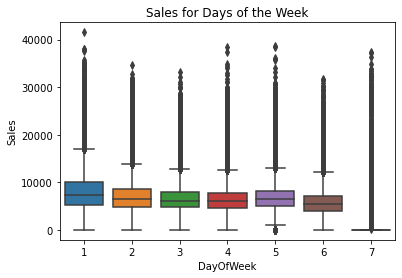

In [606]:
sns.boxplot(x="DayOfWeek", y="Sales", data=second_df)
plt.title("Sales for Days of the Week")

Text(0.5, 1.0, 'Sales for different Store Types')

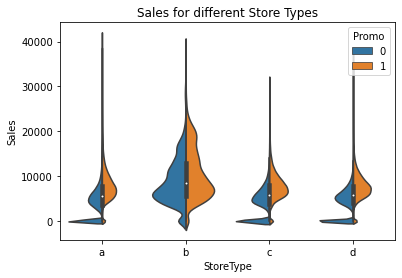

In [607]:
sns.violinplot(x="StoreType", y="Sales", hue="Promo",order=["a","b","c","d"], data=second_df, split =True)
plt.title("Sales for different Store Types")

Text(0.5, 1.0, "Sales for different StateHoliday's")

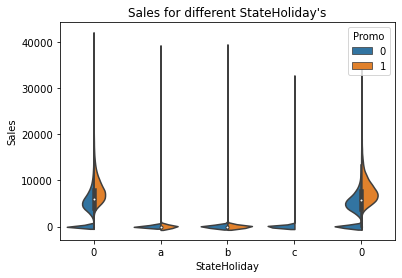

In [608]:
sns.violinplot(x="StateHoliday", y="Sales", hue="Promo", data=second_df, split =True)
plt.title("Sales for different StateHoliday's")

Text(0.5, 1.0, 'Sales for different SchoolHoliday')

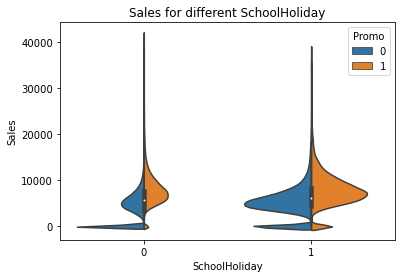

In [609]:
sns.violinplot(x="SchoolHoliday", y="Sales", hue="Promo", data=second_df, split =True)
plt.title("Sales for different SchoolHoliday")

Text(0.5, 1.0, 'Sales for different SchoolHoliday')

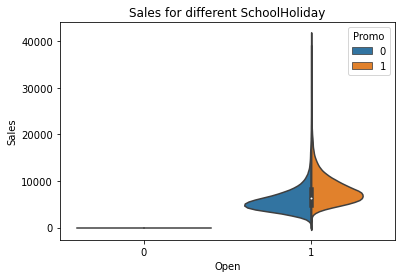

In [610]:
sns.violinplot(x="Open", y="Sales", hue="Promo", data=second_df, split =True)
plt.title("Sales for different SchoolHoliday")

Text(0.5, 1.0, 'Sales for Days of the Week')

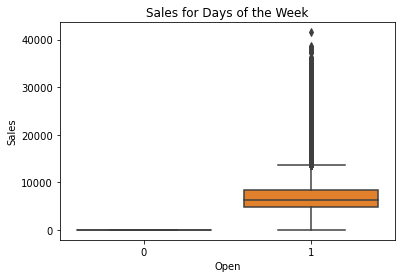

In [611]:
sns.boxplot(x="Open", y="Sales", data=second_df)
plt.title("Sales for Days of the Week")

Text(0.5, 1.0, 'Sales for Assortment Types')

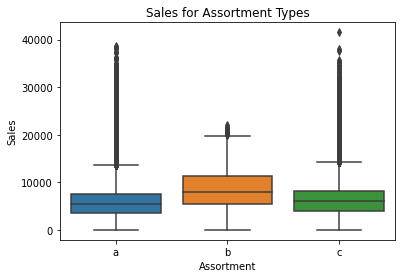

In [612]:
sns.boxplot(x="Assortment", y="Sales",order=["a","b","c"] ,data=second_df)
plt.title("Sales for Assortment Types")

Text(0.5, 1.0, 'Sales for Days of the Week')

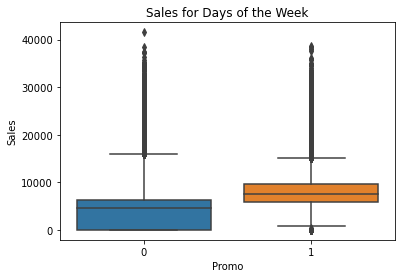

In [613]:
sns.boxplot(x="Promo", y="Sales", data=second_df)
plt.title("Sales for Days of the Week")

Text(0.5, 1.0, 'Sales for Days of the Week')

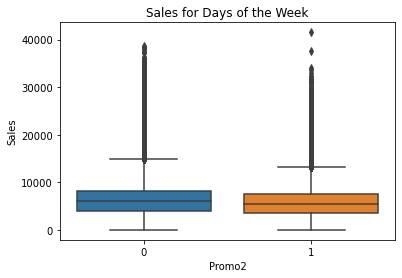

In [614]:
sns.boxplot(x="Promo2", y="Sales", data=second_df)
plt.title("Sales for Days of the Week")

# Feature Engineering -  Variable Reduction

##  Multicollinearity

Removing multicollinearity helps to remove any strongly correlating variables, which could impact on the performance of our models to do this I will be using the Variance Inflaction Factor(VIF) we pick each feature and regress it against all of the other features. For each regression

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1. For more information go to:
https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ 

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 


In [615]:
#Have to drop categorical variables
vif_reduce = second_df.drop(['StateHoliday','StoreType','Assortment','PromoInterval'], axis =1)

In [616]:
# Date also is required to be dropped
vif_reduce = vif_reduce.drop(['Date'], axis = 1)

In [617]:
# Dealing with multicollinearity through the Variance Inflation Factor(VIF) method. 
vif_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017762 non-null  int64
 1   DayOfWeek                  1017762 non-null  int64
 2   Sales                      1017762 non-null  int64
 3   Customers                  1017762 non-null  int64
 4   Open                       1017762 non-null  int64
 5   Promo                      1017762 non-null  int64
 6   SchoolHoliday              1017762 non-null  int64
 7   CompetitionDistance        1017762 non-null  int32
 8   CompetitionOpenSinceMonth  1017762 non-null  int32
 9   CompetitionOpenSinceYear   1017762 non-null  int32
 10  Promo2                     1017762 non-null  int32
 11  Promo2SinceWeek            1017762 non-null  int32
 12  Promo2SinceYear            1017762 non-null  int32
 13  Day                        1017762 non-nul

In [618]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = vif_reduce.columns

vif_data["VIF"] = [variance_inflation_factor(vif_reduce.values, i)
                        for i in range(len(vif_reduce.columns))]


In [619]:
vif_data

,features,VIF
0,Store,4.024360e+00
1,DayOfWeek,7.918760e+00
2,Sales,2.287952e+01
3,Customers,1.659186e+01
4,Open,1.245247e+01
5,Promo,2.337198e+00
6,SchoolHoliday,1.283840e+00
7,CompetitionDistance,1.639368e+00
8,CompetitionOpenSinceMonth,7.220426e+00
9,CompetitionOpenSinceYear,1.524043e+05


<AxesSubplot:xlabel='VIF', ylabel='features'>

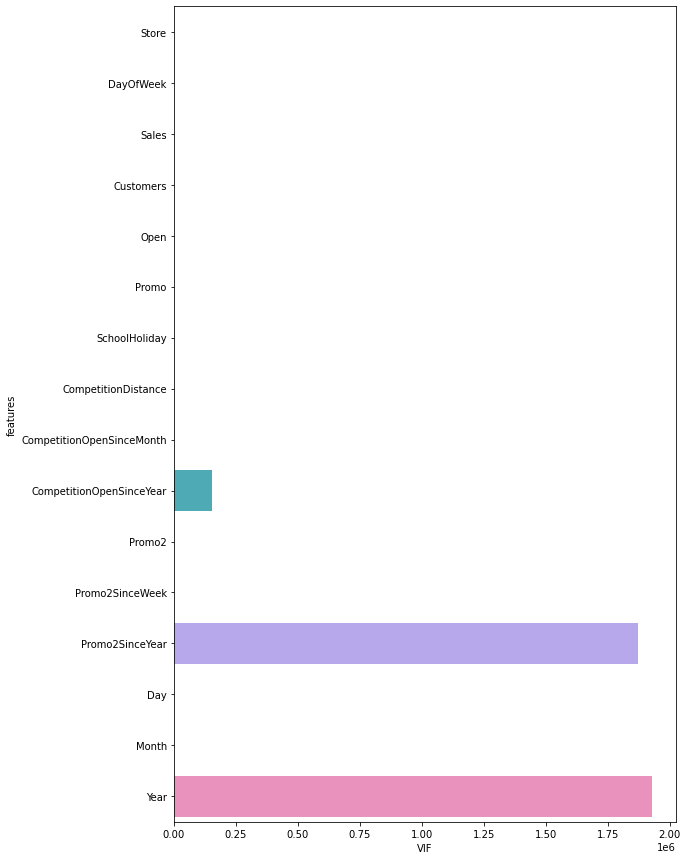

In [620]:
fig_dims = (9, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="VIF", y="features", data=vif_data)

In [621]:
#Dropping variables with high multicollinearity
vif_reduce = vif_reduce.drop(['CompetitionOpenSinceYear','Promo2SinceYear','Year'], axis = 1)

In [622]:
vif_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017762 non-null  int64
 1   DayOfWeek                  1017762 non-null  int64
 2   Sales                      1017762 non-null  int64
 3   Customers                  1017762 non-null  int64
 4   Open                       1017762 non-null  int64
 5   Promo                      1017762 non-null  int64
 6   SchoolHoliday              1017762 non-null  int64
 7   CompetitionDistance        1017762 non-null  int32
 8   CompetitionOpenSinceMonth  1017762 non-null  int32
 9   Promo2                     1017762 non-null  int32
 10  Promo2SinceWeek            1017762 non-null  int32
 11  Day                        1017762 non-null  int64
 12  Month                      1017762 non-null  int64
dtypes: int32(4), int64(9)
memory usage: 93.2 M

In [623]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = vif_reduce.columns

vif_data["VIF"] = [variance_inflation_factor(vif_reduce.values, i)
                        for i in range(len(vif_reduce.columns))]

In [624]:
vif_data

,features,VIF
0,Store,3.731253
1,DayOfWeek,5.064199
2,Sales,22.718754
3,Customers,16.460914
4,Open,10.537808
5,Promo,2.218540
6,SchoolHoliday,1.266183
7,CompetitionDistance,1.570563
8,CompetitionOpenSinceMonth,5.941617
9,Promo2,2.079886


<AxesSubplot:xlabel='VIF', ylabel='features'>

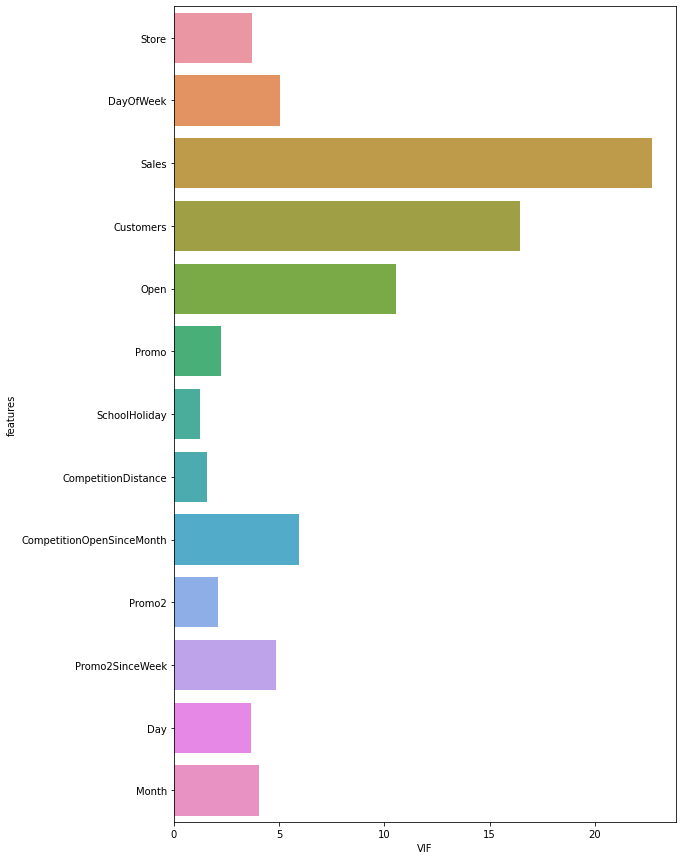

In [625]:
fig_dims = (9, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="VIF", y="features", data=vif_data)

In [626]:
vif_reduce = vif_reduce.drop(['Sales','Customers'], axis = 1)

In [627]:
vif_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017762 non-null  int64
 1   DayOfWeek                  1017762 non-null  int64
 2   Open                       1017762 non-null  int64
 3   Promo                      1017762 non-null  int64
 4   SchoolHoliday              1017762 non-null  int64
 5   CompetitionDistance        1017762 non-null  int32
 6   CompetitionOpenSinceMonth  1017762 non-null  int32
 7   Promo2                     1017762 non-null  int32
 8   Promo2SinceWeek            1017762 non-null  int32
 9   Day                        1017762 non-null  int64
 10  Month                      1017762 non-null  int64
dtypes: int32(4), int64(7)
memory usage: 77.6 MB


In [628]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = vif_reduce.columns

vif_data["VIF"] = [variance_inflation_factor(vif_reduce.values, i)
                        for i in range(len(vif_reduce.columns))]

In [629]:
vif_data

,features,VIF
0,Store,3.715112
1,DayOfWeek,5.026624
2,Open,6.043532
3,Promo,1.864973
4,SchoolHoliday,1.265967
5,CompetitionDistance,1.495068
6,CompetitionOpenSinceMonth,5.939049
7,Promo2,1.989010
8,Promo2SinceWeek,4.827428
9,Day,3.678298


<AxesSubplot:xlabel='VIF', ylabel='features'>

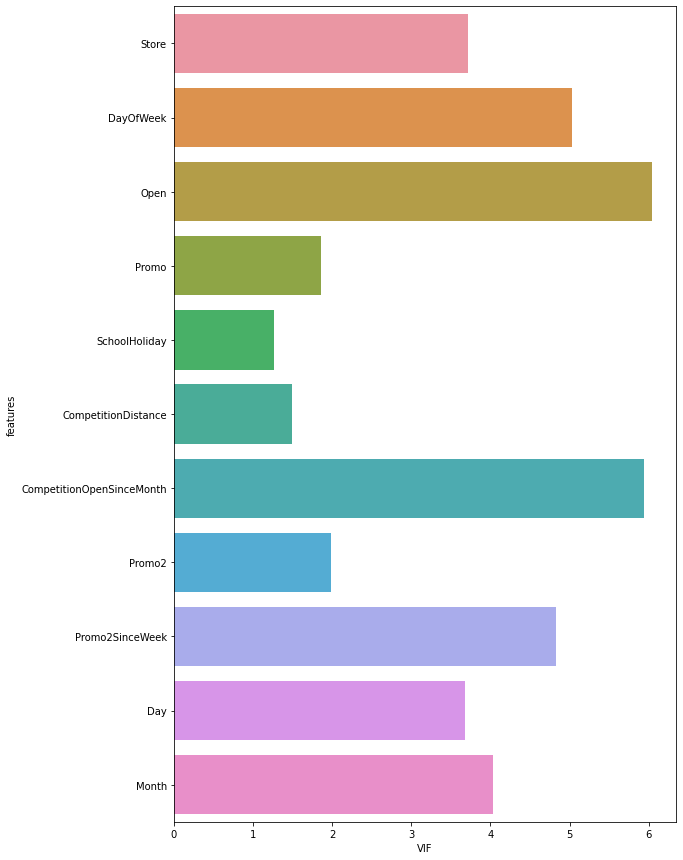

In [630]:
fig_dims = (9, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="VIF", y="features", data=vif_data)

In [631]:
vif_reduce = vif_reduce.drop(['CompetitionOpenSinceMonth'], axis = 1)

In [632]:
vif_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   Store                1017762 non-null  int64
 1   DayOfWeek            1017762 non-null  int64
 2   Open                 1017762 non-null  int64
 3   Promo                1017762 non-null  int64
 4   SchoolHoliday        1017762 non-null  int64
 5   CompetitionDistance  1017762 non-null  int32
 6   Promo2               1017762 non-null  int32
 7   Promo2SinceWeek      1017762 non-null  int32
 8   Day                  1017762 non-null  int64
 9   Month                1017762 non-null  int64
dtypes: int32(3), int64(7)
memory usage: 73.8 MB


In [633]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = vif_reduce.columns

vif_data["VIF"] = [variance_inflation_factor(vif_reduce.values, i)
                        for i in range(len(vif_reduce.columns))]

In [634]:
vif_data

,features,VIF
0,Store,3.694936
1,DayOfWeek,4.451658
2,Open,5.584189
3,Promo,1.840463
4,SchoolHoliday,1.262461
5,CompetitionDistance,1.495067
6,Promo2,1.985250
7,Promo2SinceWeek,4.794910
8,Day,3.620554
9,Month,3.958976


<AxesSubplot:xlabel='VIF', ylabel='features'>

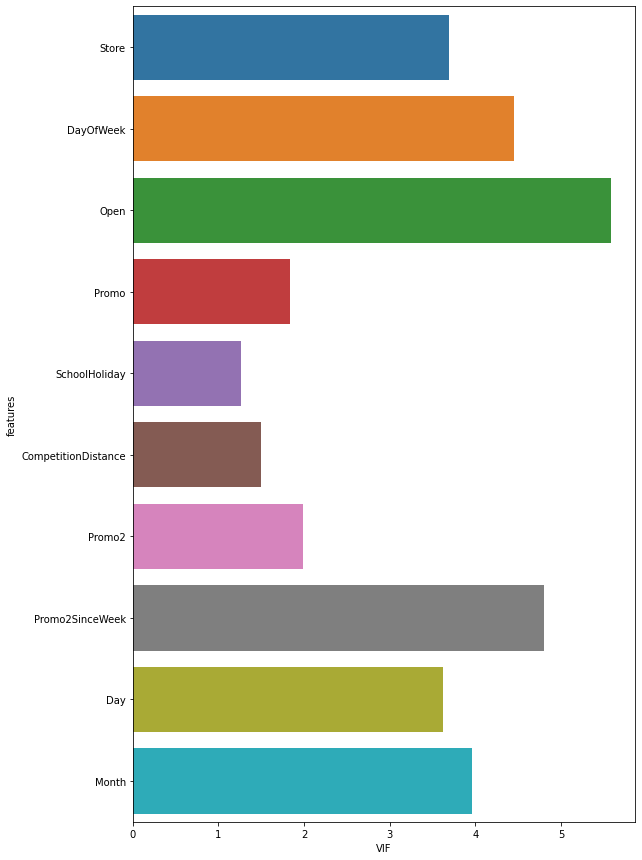

In [635]:
fig_dims = (9, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="VIF", y="features", data=vif_data)

In [636]:
vif_reduce = vif_reduce.drop(['Open'], axis = 1)

In [637]:
vif_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   Store                1017762 non-null  int64
 1   DayOfWeek            1017762 non-null  int64
 2   Promo                1017762 non-null  int64
 3   SchoolHoliday        1017762 non-null  int64
 4   CompetitionDistance  1017762 non-null  int32
 5   Promo2               1017762 non-null  int32
 6   Promo2SinceWeek      1017762 non-null  int32
 7   Day                  1017762 non-null  int64
 8   Month                1017762 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 66.0 MB


In [638]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = vif_reduce.columns

vif_data["VIF"] = [variance_inflation_factor(vif_reduce.values, i)
                        for i in range(len(vif_reduce.columns))]

In [639]:
vif_data

,features,VIF
0,Store,3.543462
1,DayOfWeek,4.358540
2,Promo,1.615421
3,SchoolHoliday,1.259057
4,CompetitionDistance,1.475424
5,Promo2,1.958005
6,Promo2SinceWeek,4.497930
7,Day,3.360732
8,Month,3.593811


<AxesSubplot:xlabel='VIF', ylabel='features'>

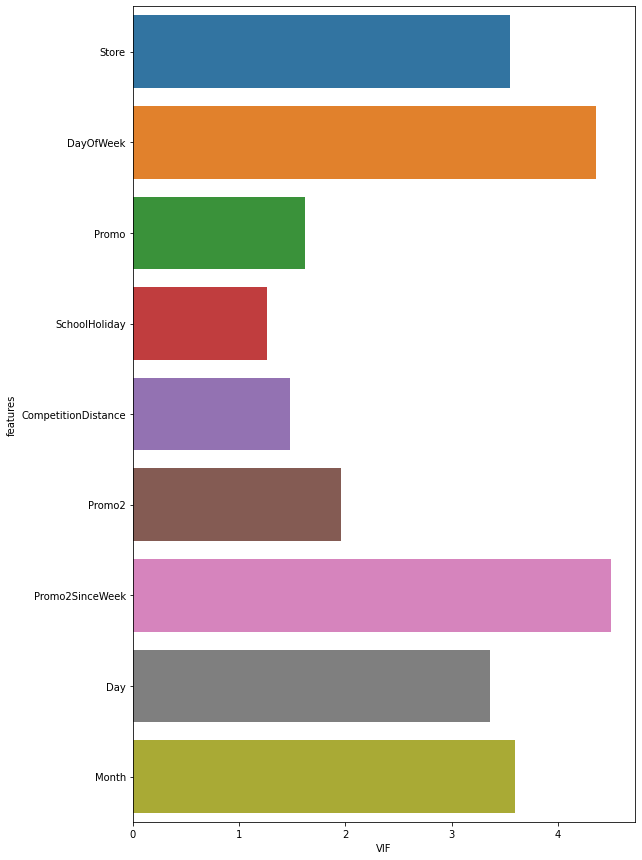

In [640]:
fig_dims = (9, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="VIF", y="features", data=vif_data)

#####  So to conclude from conducting VIF we have identified that: "CompetitionOpenSinceYear",CompetitionOpenSinceMonth","Promo2SinceYear","Year" , "Open", "Sales" and "Customers" produce high Multicollinearity. 

Therefore we will remove them from further analysis. Additionally, as Sales and customers are our predictor variabels and there is not much difference betwene the two variables. Therefore, we will keep Sales and remove Customers from further analysis.  

*****NOTE*****
We have excluded categorical variables from VIF feature selection process, as these features will naturally exhibit high multicollinarity. 

From test below, it shows that the categoric variable have  multicillinarity score of inf(Infinity)

In [641]:
corr_check = second_df[['StateHoliday','StoreType','Assortment','PromoInterval']]

In [642]:
corr_check.head()

,StateHoliday,StoreType,Assortment,PromoInterval
0,0,c,a,"Feb,May,Aug,Nov"
1,0,c,a,"Feb,May,Aug,Nov"
2,0,c,a,"Feb,May,Aug,Nov"
3,0,c,a,"Feb,May,Aug,Nov"
4,0,c,a,"Feb,May,Aug,Nov"


In [643]:
corr_check1 = pd.get_dummies(corr_check, columns=["StateHoliday", "StoreType","Assortment", "PromoInterval"])


In [644]:
corr_check1.head()

,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [645]:
corr_check1.corr(method="pearson")

,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
StateHoliday_0,1.000000,-0.883371,-0.054850,-0.031304,-0.024493,0.003935,0.001944,0.002917,-0.006921,-0.004666,0.000722,0.004541,0.008257,-0.008896,0.001817
StateHoliday_0,-0.883371,1.000000,-0.327173,-0.186721,-0.146095,-0.002749,-0.001343,-0.002097,0.004875,0.003042,-0.000896,-0.002883,-0.006867,0.007477,-0.001642
StateHoliday_a,-0.054850,-0.327173,1.000000,-0.011594,-0.009071,-0.002246,-0.001147,-0.001511,0.003847,0.003235,0.000615,-0.003350,-0.001834,0.001770,-0.000059
StateHoliday_b,-0.031304,-0.186721,-0.011594,1.000000,-0.005177,-0.000430,-0.000202,-0.000323,0.000757,0.000497,-0.000070,-0.000485,-0.000901,0.000967,-0.000191
StateHoliday_c,-0.024493,-0.146095,-0.009071,-0.005177,1.000000,0.000570,0.000268,0.000429,-0.001003,-0.000659,0.000093,0.000643,0.001195,-0.001281,0.000254
StoreType_a,0.003935,-0.002749,-0.002246,-0.000430,0.000570,1.000000,-0.136887,-0.428553,-0.726229,0.216403,-0.098714,-0.198837,0.089410,-0.044908,-0.066436
StoreType_b,0.001944,-0.001343,-0.001147,-0.000202,0.000268,-0.136887,1.000000,-0.049463,-0.083821,-0.028263,0.721131,-0.101728,-0.037900,0.048069,-0.020450
StoreType_c,0.002917,-0.002097,-0.001511,-0.000323,0.000429,-0.428553,-0.049463,1.000000,-0.262418,-0.008497,-0.035670,0.014938,-0.120133,0.075438,0.063984
StoreType_d,-0.006921,0.004875,0.003847,0.000757,-0.001003,-0.726229,-0.083821,-0.262418,1.000000,-0.219712,-0.060446,0.230847,0.002345,-0.020107,0.029952
Assortment_a,-0.004666,0.003042,0.003235,0.000497,-0.000659,0.216403,-0.028263,-0.008497,-0.219712,1.000000,-0.096022,-0.983764,0.081118,-0.027531,-0.082396


<AxesSubplot:>

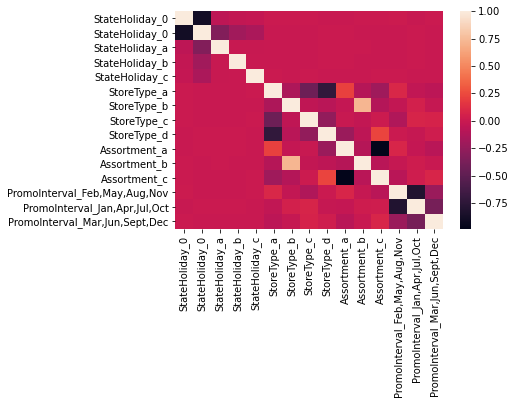

In [646]:
sns.heatmap(corr_check1.corr(method="pearson"))

###  Analysis of the Heat map

From the heat map we can outline that there is an relationship between the store types and Assortments. Therefore, it might be a good idea to drop Assortment's to help reduce multicollinearity. 

In [647]:
vif_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   Store                1017762 non-null  int64
 1   DayOfWeek            1017762 non-null  int64
 2   Promo                1017762 non-null  int64
 3   SchoolHoliday        1017762 non-null  int64
 4   CompetitionDistance  1017762 non-null  int32
 5   Promo2               1017762 non-null  int32
 6   Promo2SinceWeek      1017762 non-null  int32
 7   Day                  1017762 non-null  int64
 8   Month                1017762 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 66.0 MB


In [648]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017762 non-null  int64         
 1   DayOfWeek                  1017762 non-null  int64         
 2   Date                       1017762 non-null  datetime64[ns]
 3   Sales                      1017762 non-null  int64         
 4   Customers                  1017762 non-null  int64         
 5   Open                       1017762 non-null  int64         
 6   Promo                      1017762 non-null  int64         
 7   StateHoliday               1017762 non-null  object        
 8   SchoolHoliday              1017762 non-null  int64         
 9   StoreType                  1017762 non-null  object        
 10  Assortment                 1017762 non-null  object        
 11  CompetitionDistance        1017762 no

In [649]:
vif_reduce = second_df.drop(['CompetitionOpenSinceYear','Promo2SinceYear','Year','Customers','CompetitionOpenSinceMonth','Open','Date', 'Assortment'], axis =1)

In [650]:
vif_reduce.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance,Promo2,Promo2SinceWeek,PromoInterval,Day,Month
0,1,5,5263,1,0,1,c,1270,0,14,"Feb,May,Aug,Nov",31,7
1,1,4,5020,1,0,1,c,1270,0,14,"Feb,May,Aug,Nov",30,7
2,1,3,4782,1,0,1,c,1270,0,14,"Feb,May,Aug,Nov",29,7
3,1,2,5011,1,0,1,c,1270,0,14,"Feb,May,Aug,Nov",28,7
4,1,1,6102,1,0,1,c,1270,0,14,"Feb,May,Aug,Nov",27,7


In [651]:
vif_reduce['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [652]:
vif_reduce['StateHoliday'] = vif_reduce['StateHoliday'].replace('0', 0)

In [653]:
vif_reduce['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [654]:
vif_reduced_dummy = pd.get_dummies(vif_reduce, columns=["StateHoliday", "StoreType", "PromoInterval"])

In [655]:
vif_reduced_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017762 entries, 0 to 1017761
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   Store                           1017762 non-null  int64
 1   DayOfWeek                       1017762 non-null  int64
 2   Sales                           1017762 non-null  int64
 3   Promo                           1017762 non-null  int64
 4   SchoolHoliday                   1017762 non-null  int64
 5   CompetitionDistance             1017762 non-null  int32
 6   Promo2                          1017762 non-null  int32
 7   Promo2SinceWeek                 1017762 non-null  int32
 8   Day                             1017762 non-null  int64
 9   Month                           1017762 non-null  int64
 10  StateHoliday_0                  1017762 non-null  uint8
 11  StateHoliday_a                  1017762 non-null  uint8
 12  StateHoliday_b              

In [656]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vif_reduced_dummy = pd.DataFrame(scaler.fit_transform(vif_reduced_dummy), columns = vif_reduced_dummy.columns)
store_scale.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0.000000,0.666667,0.0,0.016482,0.727273,0.939130,0.0,NaN,NaN,NaN
1,0.000898,0.000000,0.0,0.007252,0.909091,0.930435,1.0,0.244898,0.166667,0.5
2,0.001795,0.000000,0.0,0.186050,1.000000,0.921739,1.0,0.265306,0.333333,0.5
3,0.002693,0.666667,1.0,0.007911,0.727273,0.947826,0.0,NaN,NaN,NaN
4,0.003591,0.000000,0.0,0.394119,0.272727,1.000000,0.0,NaN,NaN,NaN


In [657]:
vif_reduced_dummy.head()

,Store,DayOfWeek,Sales,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Day,Month,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0.0,0.666667,0.126664,1.0,1.0,0.016482,0.0,0.265306,1.000000,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.500000,0.120815,1.0,1.0,0.016482,0.0,0.265306,0.966667,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.333333,0.115087,1.0,1.0,0.016482,0.0,0.265306,0.933333,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.166667,0.120599,1.0,1.0,0.016482,0.0,0.265306,0.900000,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.000000,0.146856,1.0,1.0,0.016482,0.0,0.265306,0.866667,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [658]:
vif_reduce.to_csv("vif_reduced2.csv")
vif_reduced_dummy.to_csv('vif_reduced_dummy2.csv')

In [659]:
vif_reduced_dummy.to_csv('vif_reduced_dummy2.csv')

In [660]:
vif_reduced_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017762 entries, 0 to 1017761
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017762 non-null  float64
 1   DayOfWeek                       1017762 non-null  float64
 2   Sales                           1017762 non-null  float64
 3   Promo                           1017762 non-null  float64
 4   SchoolHoliday                   1017762 non-null  float64
 5   CompetitionDistance             1017762 non-null  float64
 6   Promo2                          1017762 non-null  float64
 7   Promo2SinceWeek                 1017762 non-null  float64
 8   Day                             1017762 non-null  float64
 9   Month                           1017762 non-null  float64
 10  StateHoliday_0                  1017762 non-null  float64
 11  StateHoliday_a                  1017762 non-null  float64
 12  

## Test Dataset Data cleaning

In [661]:
test = pd.read_csv('DA2021_test.csv')

In [662]:
test.isnull().mean()*100

Store              0.000000
DayOfWeek          0.000000
Date               0.000000
Sales            100.000000
Customers        100.000000
Open               0.026772
Promo              0.000000
StateHoliday       0.000000
SchoolHoliday      0.000000
dtype: float64

In [663]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [664]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [665]:
test = pd.get_dummies(test, columns=["StateHoliday"])

In [666]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           41088 non-null  int64  
 1   DayOfWeek       41088 non-null  int64  
 2   Date            41088 non-null  object 
 3   Sales           0 non-null      float64
 4   Customers       0 non-null      float64
 5   Open            41077 non-null  float64
 6   Promo           41088 non-null  int64  
 7   SchoolHoliday   41088 non-null  int64  
 8   StateHoliday_0  41088 non-null  uint8  
 9   StateHoliday_a  41088 non-null  uint8  
dtypes: float64(3), int64(4), object(1), uint8(2)
memory usage: 2.6+ MB


In [667]:
test_date = test[['Store','Date']]

In [668]:
test_date.head()

,Store,Date
0,1,17/09/2015
1,3,17/09/2015
2,7,17/09/2015
3,8,17/09/2015
4,9,17/09/2015


In [669]:

test_date['Date'] = pd.to_datetime(test_date["Date"])


<ipython-input-669-5eb9502d97b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_date['Date'] = pd.to_datetime(test_date["Date"])


In [670]:
test['Date'] = pd.to_datetime(test["Date"])

In [671]:
#second_df['Date'] = pd.to_datetime(second_df["Date"])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year

In [672]:
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Day,Month,Year
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,1,0,17,9,2015
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,1,0,17,9,2015
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,1,0,17,9,2015
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,1,0,17,9,2015
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,1,0,17,9,2015


In [673]:
test.drop(['Customers', 'Sales'], axis=1)

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Day,Month,Year
0,1,4,2015-09-17,1.0,1,0,1,0,17,9,2015
1,3,4,2015-09-17,1.0,1,0,1,0,17,9,2015
2,7,4,2015-09-17,1.0,1,0,1,0,17,9,2015
3,8,4,2015-09-17,1.0,1,0,1,0,17,9,2015
4,9,4,2015-09-17,1.0,1,0,1,0,17,9,2015
...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-01-08,1.0,0,0,1,0,8,1,2015
41084,1112,6,2015-01-08,1.0,0,0,1,0,8,1,2015
41085,1113,6,2015-01-08,1.0,0,0,1,0,8,1,2015
41086,1114,6,2015-01-08,1.0,0,0,1,0,8,1,2015


In [674]:
test['Day'] = test['Day'].astype(int)
test['Month'] = test['Month'].astype(int)
test['Year'] = test['Year'].astype(int)

In [675]:
test = test.drop(['Customers','Sales', 'Date'], axis =1)

In [676]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           41088 non-null  int64  
 1   DayOfWeek       41088 non-null  int64  
 2   Open            41077 non-null  float64
 3   Promo           41088 non-null  int64  
 4   SchoolHoliday   41088 non-null  int64  
 5   StateHoliday_0  41088 non-null  uint8  
 6   StateHoliday_a  41088 non-null  uint8  
 7   Day             41088 non-null  int32  
 8   Month           41088 non-null  int32  
 9   Year            41088 non-null  int32  
dtypes: float64(1), int32(3), int64(4), uint8(2)
memory usage: 2.1 MB


In [677]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
store_scale = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
store_scale.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Day,Month,Year
0,0.000000,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
1,0.001795,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
2,0.005386,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
3,0.006284,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
4,0.007181,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0


In [678]:
from sklearn.impute import KNNImputer

In [679]:
impute_knn = KNNImputer()
test_imputed = pd.DataFrame(impute_knn.fit_transform(store_scale))

In [680]:
test_imputed.isnull().mean()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

In [681]:
test_imputed.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
1,0.001795,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
2,0.005386,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
3,0.006284,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
4,0.007181,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0


In [682]:
test_imputed.columns = ['Store','DayOfWeek','Open','Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','Day','Month','Year']

In [683]:
test_imputed.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Day,Month,Year
0,0.000000,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
1,0.001795,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
2,0.005386,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
3,0.006284,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0
4,0.007181,0.5,1.0,1.0,0.0,1.0,0.0,0.391304,0.727273,0.0


In [684]:
test_imputed = pd.DataFrame(scaler.inverse_transform(test_imputed))

In [685]:
test_imputed.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
1,3.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
2,7.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
3,8.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
4,9.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0


In [686]:
test_imputed.columns = ['Store','DayOfWeek','Open','Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','Day','Month','Year']

In [687]:
test_imputed.isnull().mean()

Store             0.0
DayOfWeek         0.0
Open              0.0
Promo             0.0
SchoolHoliday     0.0
StateHoliday_0    0.0
StateHoliday_a    0.0
Day               0.0
Month             0.0
Year              0.0
dtype: float64

In [688]:
test_imputed.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Day,Month,Year
0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
1,3.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
2,7.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
3,8.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0
4,9.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0


####  Merging the imputed store dataset with the imputed test dataset this is the testing dataset

In [689]:
test_df = pd.merge(left=test_imputed, right=store_imputed, left_on="Store", right_on="Store")

C:\Users\ispan\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1113: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [690]:
# Adding back the date dataset
test_df = pd.merge(left=test_df, right=test_date, left_on="Store", right_on="Store")

In [691]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905408 entries, 0 to 1905407
Data columns (total 20 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Store                      float64       
 1   DayOfWeek                  float64       
 2   Open                       float64       
 3   Promo                      float64       
 4   SchoolHoliday              float64       
 5   StateHoliday_0             float64       
 6   StateHoliday_a             float64       
 7   Day                        float64       
 8   Month                      float64       
 9   Year                       float64       
 10  StoreType                  object        
 11  Assortment                 object        
 12  CompetitionDistance        int32         
 13  CompetitionOpenSinceMonth  int32         
 14  CompetitionOpenSinceYear   int32         
 15  Promo2                     int32         
 16  Promo2SinceWeek            int32    

In [692]:
test_df = test_df.drop(['Assortment'], axis =1)

In [693]:
test_df.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,Day,Month,Year,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date
0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0,c,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",2015-09-17
1,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0,c,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",2015-09-16
2,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0,c,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",2015-09-15
3,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0,c,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",2015-09-14
4,1.0,4.0,1.0,1.0,0.0,1.0,0.0,17.0,9.0,2015.0,c,1270,9,2007,0,14,2010,"Feb,May,Aug,Nov",2015-09-13


In [694]:
test_df = pd.get_dummies(test_df, columns=["StoreType", "PromoInterval"])

In [695]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905408 entries, 0 to 1905407
Data columns (total 24 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Store                           float64       
 1   DayOfWeek                       float64       
 2   Open                            float64       
 3   Promo                           float64       
 4   SchoolHoliday                   float64       
 5   StateHoliday_0                  float64       
 6   StateHoliday_a                  float64       
 7   Day                             float64       
 8   Month                           float64       
 9   Year                            float64       
 10  CompetitionDistance             int32         
 11  CompetitionOpenSinceMonth       int32         
 12  CompetitionOpenSinceYear        int32         
 13  Promo2                          int32         
 14  Promo2SinceWeek                 int32         
 15

In [696]:
test_df.to_csv("test_df_KNN.csv")

In [709]:
test_df_vif = test_df.drop(['CompetitionOpenSinceYear','Promo2SinceYear','Year','CompetitionOpenSinceMonth','Open','Date'], axis =1)

In [710]:
test_df_vif.to_csv("test_df_KNN_VIF.csv")

In [711]:
test_df_if.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905408 entries, 0 to 1905407
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Store                           float64
 1   DayOfWeek                       float64
 2   Promo                           float64
 3   SchoolHoliday                   float64
 4   StateHoliday_0                  float64
 5   StateHoliday_a                  float64
 6   Day                             float64
 7   Month                           float64
 8   CompetitionDistance             int32  
 9   Promo2                          int32  
 10  Promo2SinceWeek                 int32  
 11  StoreType_a                     uint8  
 12  StoreType_b                     uint8  
 13  StoreType_c                     uint8  
 14  StoreType_d                     uint8  
 15  PromoInterval_Feb,May,Aug,Nov   uint8  
 16  PromoInterval_Jan,Apr,Jul,Oct   uint8  
 17  PromoInterval_Mar,Jun,Sept,

In [712]:
vif_reduced_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017762 entries, 0 to 1017761
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017762 non-null  float64
 1   DayOfWeek                       1017762 non-null  float64
 2   Sales                           1017762 non-null  float64
 3   Promo                           1017762 non-null  float64
 4   SchoolHoliday                   1017762 non-null  float64
 5   CompetitionDistance             1017762 non-null  float64
 6   Promo2                          1017762 non-null  float64
 7   Promo2SinceWeek                 1017762 non-null  float64
 8   Day                             1017762 non-null  float64
 9   Month                           1017762 non-null  float64
 10  StateHoliday_0                  1017762 non-null  float64
 11  StateHoliday_a                  1017762 non-null  float64
 12  

# ANOVA results

In [ ]:
second_df.info()

In [150]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [151]:
model = ols("Sales ~ Store+ DayOfWeek", data=second_df).fit()

In [152]:
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Store,1.372144e+08,1.0,11.661004,0.000638
DayOfWeek,3.270618e+12,1.0,277949.708754,0.000000
Residual,1.197591e+13,1017759.0,NaN,NaN


In [153]:
model = ols("Sales ~ DayOfWeek", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
DayOfWeek,3.270618e+12,1.0,277946.806139,0.0
Residual,1.197605e+13,1017760.0,NaN,NaN


In [ ]:
#model = ols("Sales ~ Date", data=second_df).fit()
#rs = sm.stats.anova_lm(model, typ=2)
#rs

In [154]:
model = ols("Sales ~ Customers", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Customers,1.224862e+13,1.0,4.158095e+06,0.0
Residual,2.998045e+12,1017760.0,NaN,NaN


In [155]:
model = ols("Sales ~ Open", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Open,6.999932e+12,1.0,863887.353345,0.0
Residual,8.246736e+12,1017760.0,NaN,NaN


In [156]:
model = ols("Sales ~ Promo", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Promo,3.130777e+12,1.0,262991.759509,0.0
Residual,1.211589e+13,1017760.0,NaN,NaN


In [157]:
model = ols("Sales ~ StateHoliday", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
StateHoliday,9.909491e+11,4.0,17686.681946,0.0
Residual,1.425572e+13,1017757.0,NaN,NaN


In [158]:
model = ols("Sales ~ SchoolHoliday", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
SchoolHoliday,1.109043e+11,1.0,7457.431464,0.0
Residual,1.513576e+13,1017760.0,NaN,NaN


In [159]:
model = ols("Sales ~ StoreType", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
StoreType,2.356289e+11,3.0,5325.262861,0.0
Residual,1.501104e+13,1017758.0,NaN,NaN


In [160]:
model = ols("Sales ~ Assortment", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Assortment,1.425839e+11,2.0,4803.869467,0.0
Residual,1.510408e+13,1017759.0,NaN,NaN


In [161]:
model = ols("Sales ~ CompetitionDistance", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
CompetitionDistance,4.858658e+09,1.0,324.433155,1.609088e-72
Residual,1.524181e+13,1017760.0,NaN,NaN


In [162]:
model = ols("Sales ~ CompetitionOpenSinceMonth", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
CompetitionOpenSinceMonth,8.088291e+09,1.0,540.203818,1.829480e-119
Residual,1.523858e+13,1017760.0,NaN,NaN


In [163]:
model = ols("Sales ~ CompetitionOpenSinceYear", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
CompetitionOpenSinceYear,3.629010e+08,1.0,24.225286,8.571307e-07
Residual,1.524630e+13,1017760.0,NaN,NaN


In [164]:
model = ols("Sales ~ Promo2", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Promo2,1.186255e+11,1.0,7980.697756,0.0
Residual,1.512804e+13,1017760.0,NaN,NaN


In [165]:
model = ols("Sales ~ Promo2SinceWeek", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Promo2SinceWeek,5.761599e+09,1.0,384.749104,1.193695e-85
Residual,1.524091e+13,1017760.0,NaN,NaN


In [166]:
model = ols("Sales ~ Promo2SinceYear", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Promo2SinceYear,6.316434e+09,1.0,421.815361,1.026548e-93
Residual,1.524035e+13,1017760.0,NaN,NaN


In [167]:
model = ols("Sales ~  PromoInterval", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
PromoInterval,4.211952e+10,2.0,1409.694043,0.0
Residual,1.520455e+13,1017759.0,NaN,NaN


In [168]:
model = ols("Sales ~ Day", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Day,9.444477e+08,1.0,63.048571,2.018749e-15
Residual,1.524572e+13,1017760.0,NaN,NaN


In [169]:
model = ols("Sales ~ Month", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Month,1.386090e+08,1.0,9.252642,0.002352
Residual,1.524653e+13,1017760.0,NaN,NaN


In [170]:
model = ols("Sales ~ Year", data=second_df).fit()
rs = sm.stats.anova_lm(model, typ=2)
rs

,sum_sq,df,F,PR(>F)
Year,9.068162e+09,1.0,605.68677,1.062039e-133
Residual,1.523760e+13,1017760.0,NaN,NaN


### Analysis of ANOVA test

From looking at the siginificant level, all the variables are statistically siginificant. This means that the final dimensions of the datset is ready for the modelling and evaluation stage of the data analytics process. 

# Final Dataset 

Training Dataset = vif_reduced_dummy.

Testing Dataset =  test_df_if

# Predictive Modelling

I will be evaluating Decision Tree, Neural Network & Multiple-linear Regreession modelling methods to evaluate how effective these models are at acccurately predicitng the sales for the different stores.    